#Company Bankruptcy Prediction

Elif Aydın
230954447


##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter('ignore', category=UserWarning) # suppresses warning
# command below ensures matplotlib output can be included in Notebook
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_validate
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline

##Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/QMUL/QMUL-SEM2/Data Analytics/CW1/data.csv"

In [ ]:
dataset = pd.read_csv(path, encoding='utf-8')

In [ ]:
dataset.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


##Exploring the Data Frame

###Type of Columns

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

There are no categorical column. Each column are either float or integer. We might still do normalizing

###Checking Missing Variables

In [ ]:
dataset.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

We do not need to handle missing values since there are no missing values,

###Checking dimensions of data

In [ ]:
dataset.shape

(6819, 96)

There are 6819 rows in the dataset, which is good for training. However, there are 96 columns. Too many features can cause overfitting. Therefore we will do feature selection in the next phases

###Statistics of Each Feature

In [ ]:
dataset.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


All the features are numerical as it was stated before. Also, all the values are between 0 and 1. We will still do standardization technique so that logistic regression model will be robust against outliers

Here is the tabular description of features that we specified. Some of these features will be used in Logistic Regression model later

###Finding correlations of features between the target variable "Bankrupt"

Let's look at the correlations between the target variable "Bankrupt?" and all the other variables. Since the dataset includes too many features, correlation matrix between each pair of variable is not practical. We will sort the correlation coefficients and get the top 5 features that are positively correlated and top 5 features that are negatively correlated

In [ ]:
#Correlation of variables with target "Bankrupt?"
correlations = dataset.select_dtypes(include=[np.number]).corrwith(dataset["Bankrupt?"])

#Sort the correlations and select the top 5 features for both positive and negative correlations
top_positive_corr = correlations.sort_values(ascending=False).head(5).index.tolist()
top_negative_corr = correlations.sort_values().head(5).index.tolist()

data_positive_corr = dataset[top_positive_corr + ["Bankrupt?"]].copy()
data_negative_corr = dataset[top_negative_corr + ["Bankrupt?"]].copy()

In [ ]:
print("Features that are highly positively correlated with company going bankrupt:")
print(top_positive_corr)

Features that are highly positively correlated with company going bankrupt:
 Debt ratio %                           0.250161
 Current Liability to Assets            0.194494
 Borrowing dependency                   0.176543
 Current Liability to Current Assets    0.171306
 Liability to Equity                    0.166812
dtype: float64


In [ ]:
print("Features that are highly negatively correlated with company going bankrupt:")
print(top_negative_corr)

Features that are highly negatively correlated with company going bankrupt:
 ROA(C) before interest and depreciation before interest   -0.260807
 ROA(B) before interest and depreciation after tax         -0.273051
 ROA(A) before interest and % after tax                    -0.282941
 Net Income to Total Assets                                -0.315457
 Net Income Flag                                                 NaN
dtype: float64


In [ ]:
def corrbargraph(x_value, y_value, dataset):
    plt.figure(figsize=(15,8))
    blue = "skyblue"

    for i in range(2,6):
        plt.subplot(2,3,i)
        sns.barplot(x=x_value, y=y_value[i-1], data=dataset, color=blue)

    plt.tight_layout(pad=0.5)

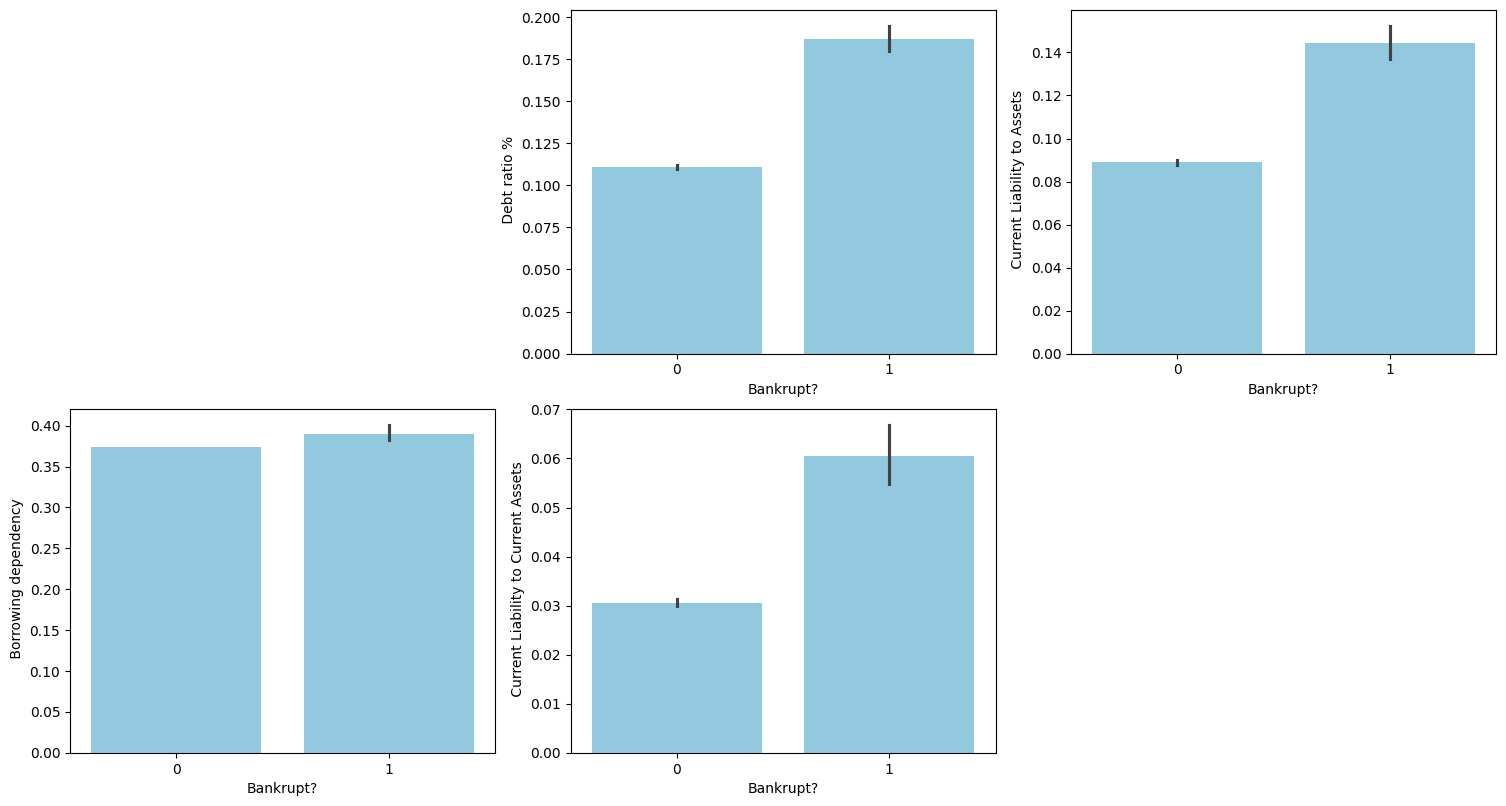

In [ ]:
x = data_positive_corr.columns.tolist()[-1]
y = data_positive_corr.columns.tolist()[:-1]

corrbargraph(x, y, dataset)

This plot suggests that companies that are bankrupt have high debt ratio, liability assets and high ratio of liability to current assets

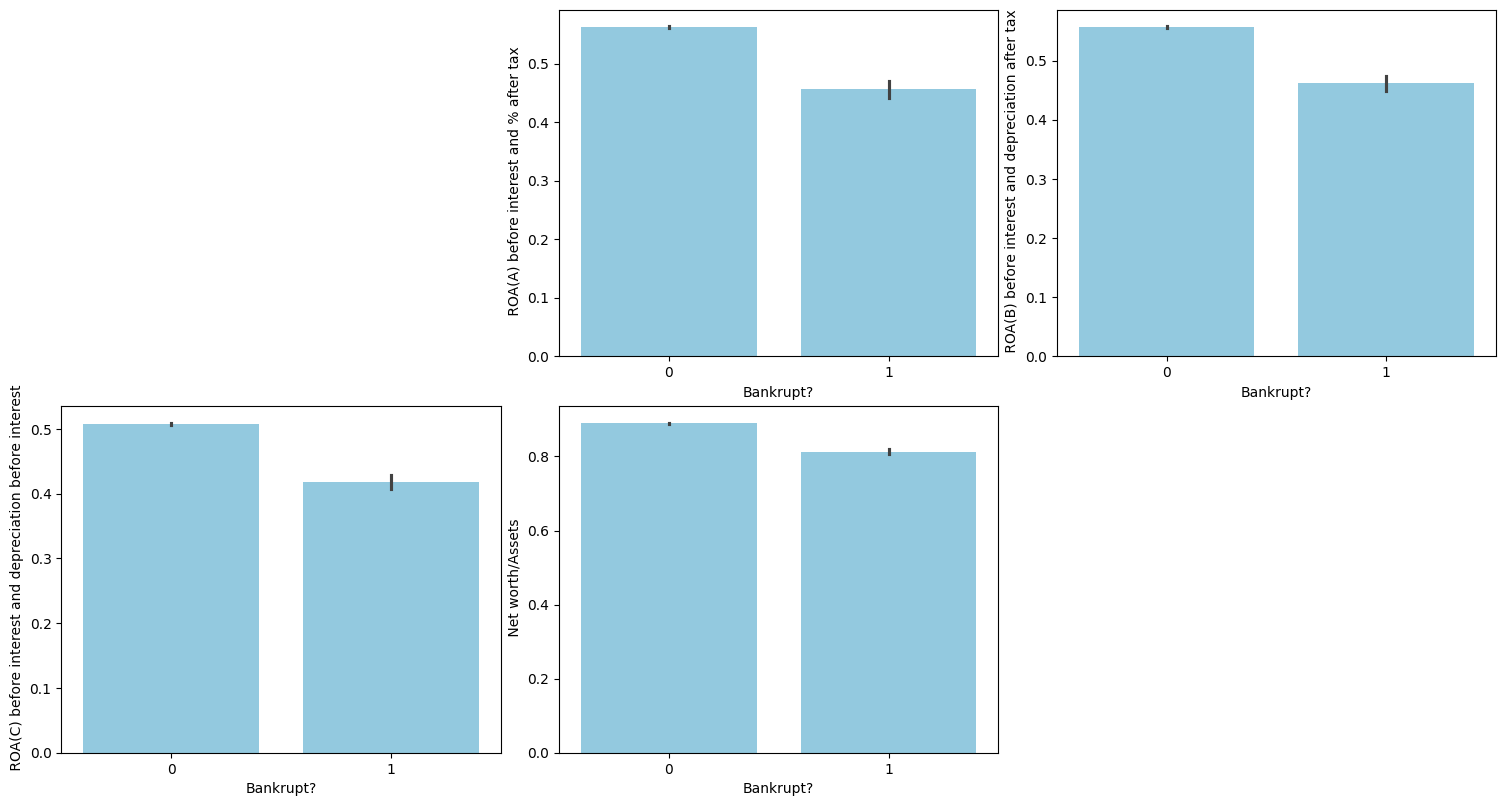

In [ ]:
x = data_negative_corr.columns.tolist()[-1]
y = data_negative_corr.columns.tolist()[:-1]

corrbargraph(x, y, dataset)

This plot suggests that companies that have high ROA are unlikely to go bankrupt. Note: ROA stands for return on assets. It is a financial ratio which indicates how profitable a company is in relation to its total assets.


###Tabular Description of some selected features

In [ ]:
 features_describe = [" Debt ratio %"," Current Liability to Assets",
 " Borrowing dependency",
 " Current Liability to Current Assets",
 " Liability to Equity"]

In [ ]:
dataset[features_describe].describe()

,Debt ratio %,Current Liability to Assets,Borrowing dependency,Current Liability to Current Assets,Liability to Equity
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.113177,0.090673,0.374654,0.031506,0.280365
std,0.053920,0.050290,0.016286,0.030845,0.014463
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.072891,0.053301,0.370168,0.018034,0.276944
50%,0.111407,0.082705,0.372624,0.027597,0.278778
75%,0.148804,0.119523,0.376271,0.038375,0.281449
max,1.000000,1.000000,1.000000,1.000000,1.000000


###Plotting of distribution of selected features

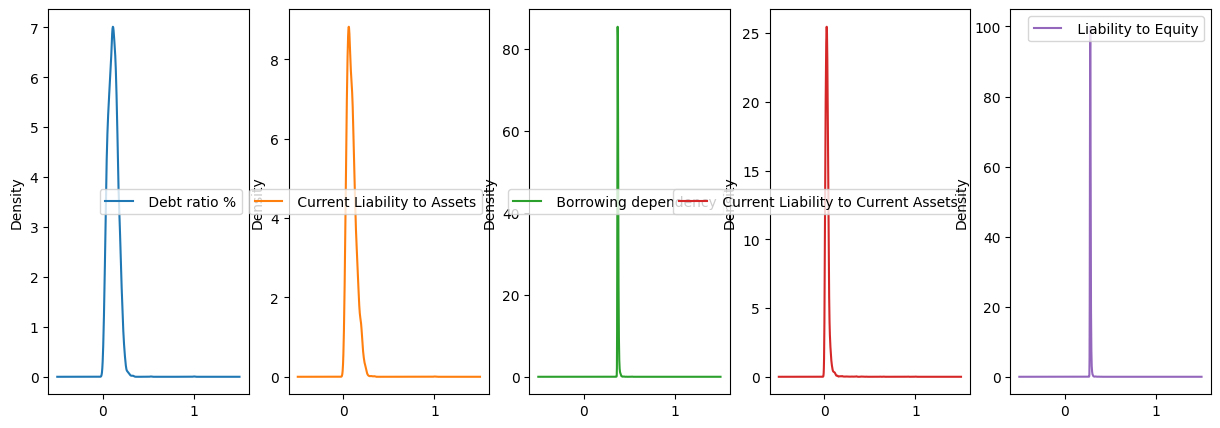

In [ ]:
dataset[features_describe].plot(kind='density', subplots=True, layout=(1, len(features_describe)), sharex=False, figsize=(15, 5))
plt.show()

###Boxplot of selected features to see outliers

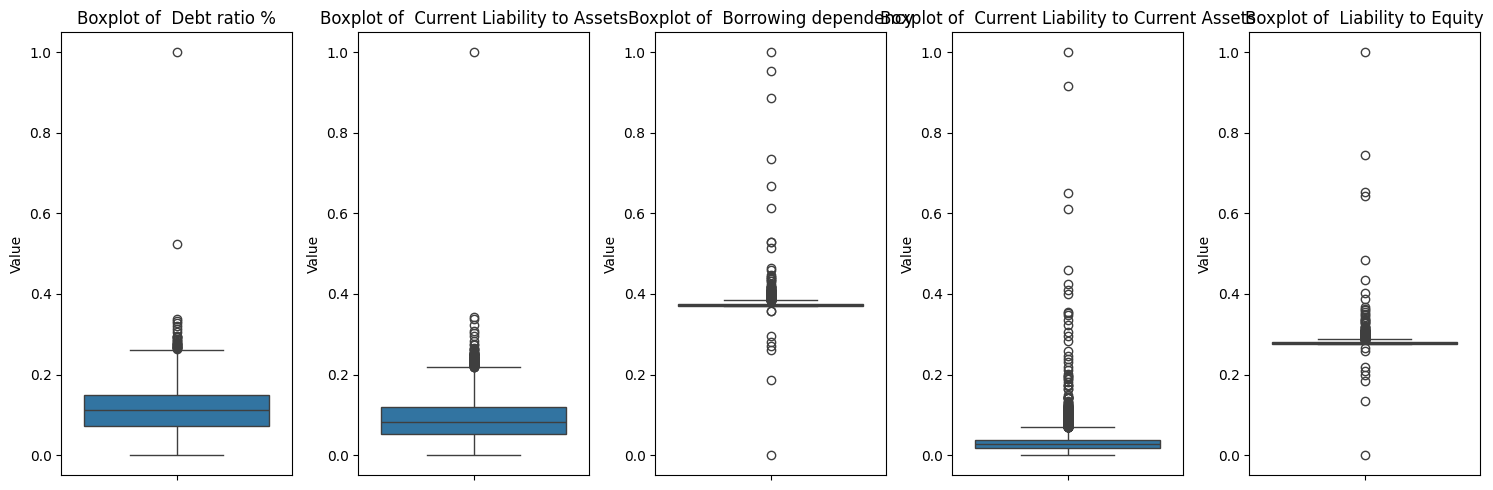

In [ ]:
#Plot boxplots for outliers of selected features
fig, axes = plt.subplots(1, len(features_describe), figsize=(15, 5))

for i, feature in enumerate(features_describe):
    sns.boxplot(y=dataset[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

###Check class balance between non-bankrupt and bankrupt instances

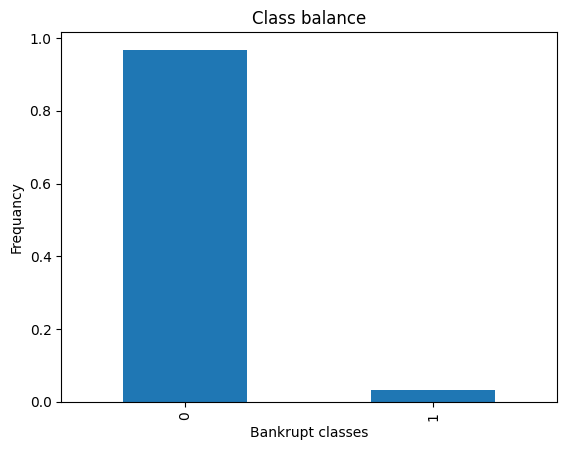

In [ ]:
dataset['Bankrupt?'].value_counts(normalize= True).plot(kind= 'bar')
plt.xlabel("Bankrupt classes")
plt.ylabel("Frequancy")
plt.title("Class balance");

This suggest data is imbalanced, lots of instances for no-Bankrupt companies. We might need to use different techniques in training for class imbalance problem.
0 represents non-bankrupt classes and 1 represents banktrup classes

Also, we have lots of features. It might be hard to train for computational reasons, also it is vulnerable to overfit. We might to regularization to avoid overfitting. Also we should choose a feature selection algorithm and pick the best features for training

##Standardization of Data

We use standardization (z-score normalization) except on the target variable (Bankrupt column) so that models like Logistic Regression will work better by being robust against outliers.

In [ ]:
#Initialize the StandardScaler
scaler = StandardScaler()

#Select columns to be normalized, excluding the target
columns_to_normalize = [col for col in dataset.columns if col != 'Bankrupt?']

# Standardize the data, except for the target
dataset[columns_to_normalize] = scaler.fit_transform(dataset[columns_to_normalize])

print(dataset)

      Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                          -2.217909          
1             1                                          -0.673828          
2             1                                          -1.303672          
3             1                                          -1.735886          
4             1                                          -0.661778          
...         ...                                                ...          
6814          0                                          -0.189395          
6815          0                                          -0.494676          
6816          0                                          -0.534845          
6817          0                                           0.017875          
6818          0                                          -0.199839          

       ROA(A) before interest and % after tax  \
0                         

After standardization, let's plot the distribution of selected features again

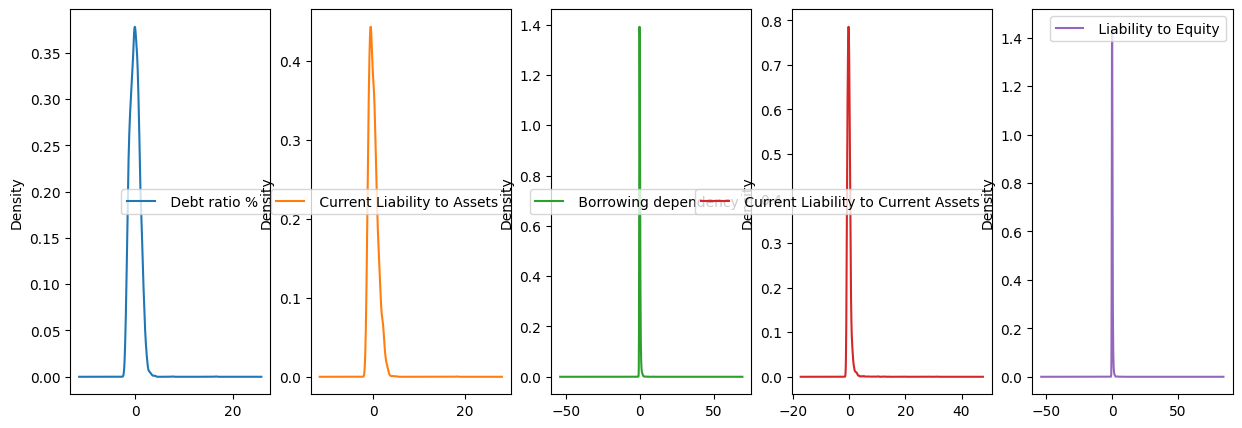

In [ ]:
#Plot the distributions of selected features
dataset[features_describe].plot(kind='density', subplots=True, layout=(1, len(features_describe)), sharex=False, figsize=(15, 5))
plt.show()

Mean of features are 0 as expected

##Models

###Logistic Regression

####Selecting Features for Logistic Regression Model

In [ ]:
#Separate x and target y
X = dataset.drop(columns=['Bankrupt?'])
y = dataset['Bankrupt?']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Initialize the logistic regression model
model = LogisticRegression()

#Initialize the RFE selector with desired number of features to select
num_features_to_select = 12  # You can adjust this number as needed
rfe_selector = RFE(estimator=model, n_features_to_select=num_features_to_select, step=1)

In [ ]:
#Fit the RFE selector to the training data
rfe_selector = rfe_selector.fit(X_train, y_train)

#Get the selected features
selected_features = X_train.columns[rfe_selector.support_]

print("Selected Features:")
print(selected_features)

Selected Features:
Index([' Operating Profit Rate',
       ' Non-industry income and expenditure/revenue',
       ' Net Value Per Share (B)', ' Net Value Per Share (C)',
       ' Persistent EPS in the Last Four Seasons',
       ' Revenue Per Share (Yuan ¥)', ' Debt ratio %', ' Net worth/Assets',
       ' Operating profit/Paid-in capital', ' Cash/Total Assets',
       ' Current Liability to Assets', ' Current Liabilities/Liability'],
      dtype='object')


Selected Features:
Index([' Operating Profit Rate',
       ' Non-industry income and expenditure/revenue',
       ' Net Value Per Share (B)', ' Net Value Per Share (C)',
       ' Persistent EPS in the Last Four Seasons',
       ' Revenue Per Share (Yuan ¥)', ' Debt ratio %', ' Net worth/Assets',
       ' Operating profit/Paid-in capital', ' Cash/Total Assets',
       ' Current Liability to Assets', ' Current Liabilities/Liability'],
      dtype='object')

####Training and Evaluation of Logistic Regression

In [ ]:
X = dataset[selected_features]  #Using only selected features
y = dataset['Bankrupt?']

#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Stratified K-Folds cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

#Create a pipeline for the logistic regression model
pipeline = Pipeline([
    ('classifier', LogisticRegression(max_iter=10000))
])

#Perform cross-validation and evaluate metrics on the training set
cv_results = cross_validate(pipeline, X_train, y_train, cv=cv, scoring=scoring)

#Output the average scores for each metric
print("CV Accuracy: ", np.mean(cv_results['test_accuracy']))
print("CV Precision: ", np.mean(cv_results['test_precision']))
print("CV Recall: ", np.mean(cv_results['test_recall']))
print("CV F1 Score: ", np.mean(cv_results['test_f1']))

#Fit the model on the entire training set and evaluate on the test set
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix on Test Set:")
print(confusion_matrix(y_test, y_pred))

CV Accuracy:  0.9668194317140237
CV Precision:  0.47023172905525845
CV Recall:  0.15349206349206349
CV F1 Score:  0.22920566944618753

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1320
           1       0.75      0.20      0.32        44

    accuracy                           0.97      1364
   macro avg       0.86      0.60      0.65      1364
weighted avg       0.97      0.97      0.96      1364

Confusion Matrix on Test Set:
[[1317    3]
 [  35    9]]


Confusion matrix suggests we have many false negatives. It means we identified a company is bankrupt but it was actually non-bankrupt.

False positive rate (saying a company is non-bankrupt but in fact it was bankrupt) is low which is good since our objective is to not miss non-bankrupt companies

####Training and Evaluation of Logistic Regression with SMOTE

Class Imbalance Problem: Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of samples dataset in a balanced way. It works by generating new instances from existing minority cases.

In [ ]:
X = dataset[selected_features]  #Using only selected features
y = dataset['Bankrupt?']

#Stratified K-Folds cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

#Create a pipeline that first applies SMOTE and then fits the logistic regression model
pipeline_smote = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=10000))
])

#Perform cross-validation and evaluate metrics
cv_results = cross_validate(pipeline_smote, X, y, cv=cv, scoring=scoring)

#Output the average scores for each metric
print("CV Accuracy: ", np.mean(cv_results['test_accuracy']))
print("CV Precision: ", np.mean(cv_results['test_precision']))
print("CV Recall: ", np.mean(cv_results['test_recall']))
print("CV F1 Score: ", np.mean(cv_results['test_f1']))

CV Accuracy:  0.8686006157712309
CV Precision:  0.17806313707297722
CV Recall:  0.8454545454545455
CV F1 Score:  0.29345584590144114


Applying SMOTE increased Recall significantly but decreased precision. It is due to decreasing the "false negatives" but "false positive" rate increased. In overall, SMOTE achieved a better F1 score. It is indeed not useful, since we want don't want to miss out bankrupt companies, we prioritize decreasing the "false positive" rates

####ROC Curves of Logistic Regression and Logistic Regression with SMOTE

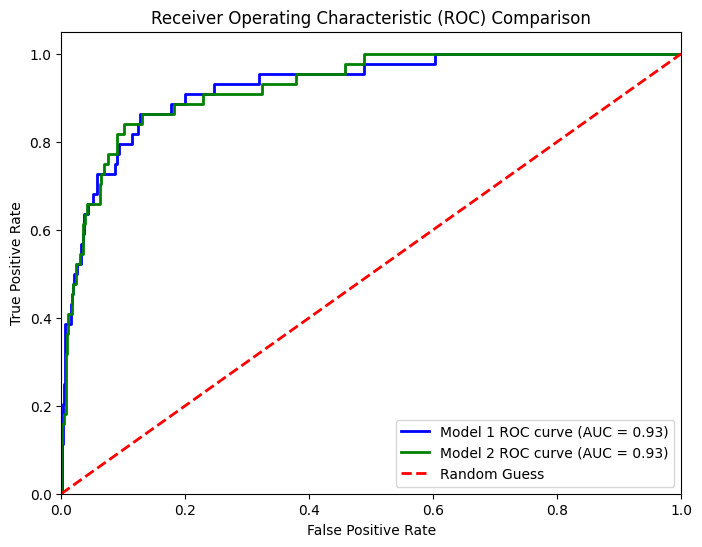

In [ ]:
#Predict probabilities for the positive class with both pipelines
y_probabilities_1 = pipeline.predict_proba(X_test)[:, 1]  #For the first pipeline
pipeline_smote.fit(X_train, y_train)  #Fit the pipeline on the entire training dataset
y_probabilities_2 = pipeline_smote.predict_proba(X_test)[:, 1]  # For the second pipeline

#Compute ROC curve and AUC for the first model
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_probabilities_1)
roc_auc1 = auc(fpr1, tpr1)

#Compute ROC curve and AUC for the second model
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_probabilities_2)
roc_auc2 = auc(fpr2, tpr2)

#Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='blue', lw=2, label='Model 1 ROC curve (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='Model 2 ROC curve (AUC = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Comparison')
plt.legend(loc='lower right')
plt.show()

ROC Curve suggests that both of the models achieve good ratio of TPR/FPR (True Positive Rate to False Positive Rate). Applying SMOTE did not change the AUC score

###Decision Tree Classifier

####Training and Evaluation of Decision Tree with SMOTE

In [ ]:
X = dataset.drop('Bankrupt?', axis=1)
y = dataset['Bankrupt?']

#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Stratified K-Folds cross-validator for evaluation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

#DecisionTreeClassifier in the pipeline
pipeline_decision_tree = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

#Perform cross-validation and evaluate metrics on the training set
cv_results = cross_validate(pipeline_decision_tree, X_train, y_train, cv=cv, scoring=scoring, return_train_score=False)

#Output the average scores for each metric
print("CV Accuracy: ", np.mean(cv_results['test_accuracy']))
print("CV Precision: ", np.mean(cv_results['test_precision']))
print("CV Recall: ", np.mean(cv_results['test_recall']))
print("CV F1 Score: ", np.mean(cv_results['test_f1']))

#Fit the model on the entire training set and evaluate on the test set
pipeline_decision_tree.fit(X_train, y_train)
y_pred = pipeline_decision_tree.predict(X_test)

#Output classification report and confusion matrix for the test set
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix on Test Set:")
print(confusion_matrix(y_test, y_pred))

CV Accuracy:  0.9259395050412464
CV Precision:  0.19894858395222595
CV Recall:  0.4317460317460317
CV F1 Score:  0.27147616619314735

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1320
           1       0.27      0.50      0.35        44

    accuracy                           0.94      1364
   macro avg       0.63      0.73      0.66      1364
weighted avg       0.96      0.94      0.95      1364

Confusion Matrix on Test Set:
[[1260   60]
 [  22   22]]


Decision Tree Classifier gives lower "False Negative" rates but higher "False Positive" rates. It is not prefferable for our case because we want to minimize "false positive" rates. We want to correctly identify bankrupt companies.

###Comparing ROC Curves of Logistic regression and Decision Tree both with SMOTE

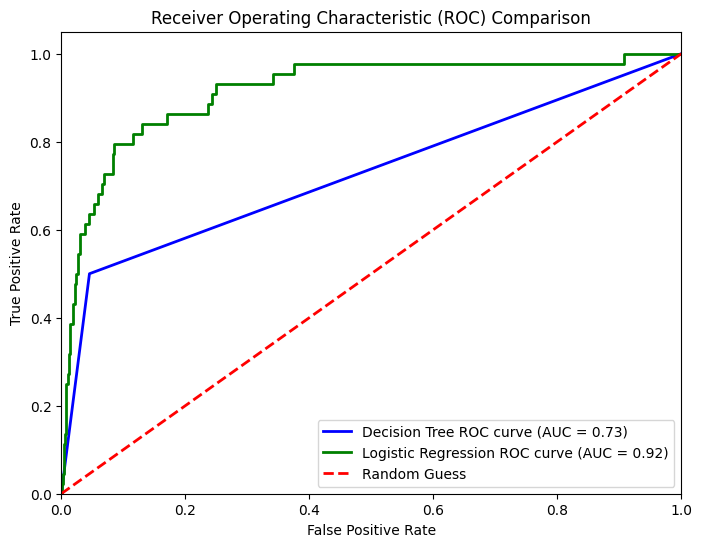

In [ ]:
#Predict probabilities for the positive class with both pipelines
y_probabilities_1 = pipeline_decision_tree.predict_proba(X_test)[:, 1]  #For the first pipeline
pipeline_smote.fit(X_train, y_train)  #Fit the pipeline on the entire training dataset
y_probabilities_2 = pipeline_smote.predict_proba(X_test)[:, 1]  # For the second pipeline

#Compute ROC curve and AUC for the first model
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_probabilities_1)
roc_auc1 = auc(fpr1, tpr1)

#Compute ROC curve and AUC for the second model
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_probabilities_2)
roc_auc2 = auc(fpr2, tpr2)

#Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='blue', lw=2, label='Decision Tree ROC curve (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='Logistic Regression ROC curve (AUC = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Comparison')
plt.legend(loc='lower right')
plt.show()

ROC Curves are very different between Logistic Regression and Decision Tree Classifier. Area under ROC curve (AUC) is higher in Logistic Regression which suggests we have a higher TPR/FPR Rate.

Moreover, confusion matrix showed that Logistic Regression have lower False Positives which is prefferrable for our task

##Conclusion

Both models produced have an	accuracy	greater	than	90%. However, it is important to examine precision,  recall,  F1  scores  and  the confusion matrix since the dataset is very imbalanced. Moreover, since our task is to correctly identify bankrupt companies,  it  is  prioritized  to  have low false positive rates and high true positive	rates.	Considering	these ratios, logistic regression achieved the best results using 12 features. Those features were selected based on RFE technique.
